## AND, OR, XOR, NAND, NOR, XNOR using CC_FRAUD.csv

### Load Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

### Read Data

In [2]:
df = pd.read_csv("CC_FRAUD.csv")

### Glimse of data

In [3]:
df.head()

,DOMAIN,STATE,ZIPCODE,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT,TRN_TYPE
0,CDRZLKAJIJVQHCN.COM,AO,675,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95,0
1,NEKSXUK.NET,KK,680,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85,0
2,XOSOP.COM,UO,432,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85,0
3,TMA.COM,KR,119,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01,0
4,VUHZRNB.COM,PO,614,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95,0


In [4]:
df.shape

(94682, 20)

In [5]:
df["TRN_TYPE"].value_counts()

0    92588
1     2094
Name: TRN_TYPE, dtype: int64

### Credit card Fraud- data unbalance

/home/abhigyan/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0, 0, 'Normal'), Text(1, 0, 'Fraud')]

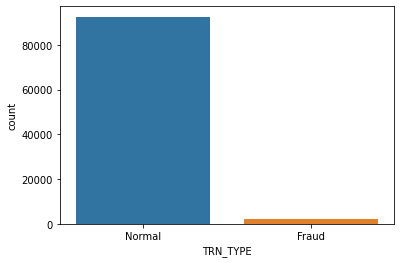

In [6]:
graph = sns.countplot(df["TRN_TYPE"],data=df)
graph.set_xticklabels(["Normal","Fraud"])

### check for missing values

<AxesSubplot:>

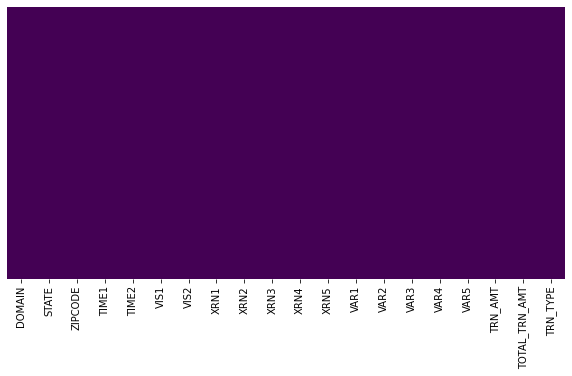

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis',cbar=False)

In [8]:
target = df["TRN_TYPE"]

In [9]:
target

0        0
1        0
2        0
3        0
4        0
        ..
94677    0
94678    0
94679    0
94680    0
94681    0
Name: TRN_TYPE, Length: 94682, dtype: int64

In [10]:
df= df.drop(["DOMAIN","STATE","ZIPCODE","TRN_TYPE"],axis=1)

In [11]:
df.head()

,TIME1,TIME2,VIS1,VIS2,XRN1,XRN2,XRN3,XRN4,XRN5,VAR1,VAR2,VAR3,VAR4,VAR5,TRN_AMT,TOTAL_TRN_AMT
0,12,12,1,0,0,1,1,0,1,2,1,16.680,34,0,12.95,12.95
1,18,18,1,0,0,0,0,0,1,3,0,37.880,23,0,38.85,38.85
2,3,3,1,0,0,1,1,0,1,3,1,-9.080,19,2,38.85,38.85
3,23,23,0,0,1,0,0,0,3,0,0,-6.392,18,0,11.01,11.01
4,9,9,0,0,0,1,0,0,1,3,0,42.512,7,0,12.95,12.95


## splitting data in train and test sets

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size=0.3,random_state=42)

In [13]:
x_test.shape

(28405, 16)

In [14]:
x_train.shape

(66277, 16)

In [15]:
y_test.value_counts()

0    27769
1      636
Name: TRN_TYPE, dtype: int64

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
from sklearn.model_selection import cross_val_score

In [17]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score)}

kfold = KFold(n_splits=10, random_state=42, shuffle=True) 

results = cross_validate(estimator=rf,
                                          X=df,
                                          y=target,
                                          cv=kfold,
                                          scoring=scoring)

In [18]:
results

{'fit_time': array([15.62853885, 13.34750867, 15.2167418 , 13.57386279, 14.94461536,
        13.46903443, 16.25557494, 14.95307446, 14.02482343, 14.60130572]),
 'score_time': array([0.31609988, 0.32493258, 0.26607084, 0.29225636, 0.33255768,
        0.30772901, 0.30359149, 0.30533075, 0.3223989 , 0.2888999 ]),
 'test_accuracy': array([0.97518217, 0.97813919, 0.97634136, 0.97782003, 0.9765526 ,
        0.97613012, 0.97697507, 0.97887621, 0.97729193, 0.97496831]),
 'test_precision': array([0.24137931, 0.26315789, 0.375     , 0.43333333, 0.26315789,
        0.13333333, 0.26666667, 0.38888889, 0.25      , 0.17857143]),
 'test_recall': array([0.03181818, 0.02525253, 0.0412844 , 0.0631068 , 0.02347418,
        0.00930233, 0.03921569, 0.03571429, 0.02439024, 0.02283105]),
 'test_f1_score': array([0.0562249 , 0.04608295, 0.07438017, 0.11016949, 0.04310345,
        0.0173913 , 0.06837607, 0.06542056, 0.04444444, 0.04048583])}

In [19]:
precision = np.mean(results['test_precision'])
precision
np.mean(results['test_recall'])

0.0316389676961633

In [20]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
y_pred_rf = rf.predict(x_test)
print(accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf, digits=4))

0.9767294490406618
[[27727    42]
 [  619    17]]
              precision    recall  f1-score   support

           0     0.9782    0.9985    0.9882     27769
           1     0.2881    0.0267    0.0489       636

    accuracy                         0.9767     28405
   macro avg     0.6331    0.5126    0.5186     28405
weighted avg     0.9627    0.9767    0.9672     28405



## AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100, random_state = 42,algorithm='SAMME.R',
                         learning_rate=0.8,)
ada.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

In [23]:
y_pred_ada = ada.predict(x_test)
print(accuracy_score(y_test,y_pred_ada))
print(confusion_matrix(y_test,y_pred_ada))
print(classification_report(y_test,y_pred_ada, digits=4))

0.9776095757789122
[[27769     0]
 [  636     0]]
              precision    recall  f1-score   support

           0     0.9776    1.0000    0.9887     27769
           1     0.0000    0.0000    0.0000       636

    accuracy                         0.9776     28405
   macro avg     0.4888    0.5000    0.4943     28405
weighted avg     0.9557    0.9776    0.9665     28405



/home/abhigyan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abhigyan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abhigyan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Gradient Boosting

In [24]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [26]:
y_pred_gb = gb.predict(x_test)
print(accuracy_score(y_test,y_pred_gb))
print(confusion_matrix(y_test,y_pred_gb))
print(classification_report(y_test,y_pred_gb, digits=4))

0.977187114944552
[[27757    12]
 [  636     0]]
              precision    recall  f1-score   support

           0     0.9776    0.9996    0.9885     27769
           1     0.0000    0.0000    0.0000       636

    accuracy                         0.9772     28405
   macro avg     0.4888    0.4998    0.4942     28405
weighted avg     0.9557    0.9772    0.9663     28405



## XG Boost

In [27]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [28]:
xgb.fit(x_train,y_train)

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:24:35] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [29]:
y_pred_xgb = xgb.predict(x_test)
print(accuracy_score(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))
print(classification_report(y_test,y_pred_xgb, digits=4))

0.9775039605703221
[[27762     7]
 [  632     4]]
              precision    recall  f1-score   support

           0     0.9777    0.9997    0.9886     27769
           1     0.3636    0.0063    0.0124       636

    accuracy                         0.9775     28405
   macro avg     0.6707    0.5030    0.5005     28405
weighted avg     0.9640    0.9775    0.9668     28405



## Not Logic

In [30]:
def negation(y):
    x = np.where(y == 0, 1, 0)
    return x

In [31]:
arr1 = np.array([1,0,1,1,0,1,0])
arr2 = negation(arr1)
arr2

array([0, 1, 0, 0, 1, 0, 1])

## Adaboost and GB (AND)

In [32]:
y_pred = y_pred_ada & y_pred_gb
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9776095757789122
[[27769     0]
 [  636     0]]
              precision    recall  f1-score   support

           0     0.9776    1.0000    0.9887     27769
           1     0.0000    0.0000    0.0000       636

    accuracy                         0.9776     28405
   macro avg     0.4888    0.5000    0.4943     28405
weighted avg     0.9557    0.9776    0.9665     28405



/home/abhigyan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abhigyan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abhigyan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Adaboost and Gradient Boost (OR)

In [33]:
y_pred = y_pred_ada | y_pred_gb
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.977187114944552
[[27757    12]
 [  636     0]]
              precision    recall  f1-score   support

           0     0.9776    0.9996    0.9885     27769
           1     0.0000    0.0000    0.0000       636

    accuracy                         0.9772     28405
   macro avg     0.4888    0.4998    0.4942     28405
weighted avg     0.9557    0.9772    0.9663     28405



## Adaboost and GB (XOR) 

In [34]:
y_pred = y_pred_ada ^ y_pred_gb
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.977187114944552
[[27757    12]
 [  636     0]]
              precision    recall  f1-score   support

           0     0.9776    0.9996    0.9885     27769
           1     0.0000    0.0000    0.0000       636

    accuracy                         0.9772     28405
   macro avg     0.4888    0.4998    0.4942     28405
weighted avg     0.9557    0.9772    0.9663     28405



## Adaboost and GB (NAND)

In [35]:
y_pred = negation(y_pred_ada & y_pred_gb)
y_pred.shape
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.022390424221087838
[[    0 27769]
 [    0   636]]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     27769
           1     0.0224    1.0000    0.0438       636

    accuracy                         0.0224     28405
   macro avg     0.0112    0.5000    0.0219     28405
weighted avg     0.0005    0.0224    0.0010     28405



/home/abhigyan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abhigyan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abhigyan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Ada and GB (NOR)

In [36]:
y_pred = negation(y_pred_ada | y_pred_gb)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.022812885055447985
[[   12 27757]
 [    0   636]]
              precision    recall  f1-score   support

           0     1.0000    0.0004    0.0009     27769
           1     0.0224    1.0000    0.0438       636

    accuracy                         0.0228     28405
   macro avg     0.5112    0.5002    0.0223     28405
weighted avg     0.9781    0.0228    0.0018     28405



## Ada and GB (XNOR)

In [37]:
y_pred = negation((y_pred_ada ^ y_pred_gb))
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.022812885055447985
[[   12 27757]
 [    0   636]]
              precision    recall  f1-score   support

           0     1.0000    0.0004    0.0009     27769
           1     0.0224    1.0000    0.0438       636

    accuracy                         0.0228     28405
   macro avg     0.5112    0.5002    0.0223     28405
weighted avg     0.9781    0.0228    0.0018     28405



## Under Sampling

In [38]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [39]:
us = NearMiss(0.8)
x_train_us,y_train_us = us.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_us)))

/home/abhigyan/.local/lib/python3.8/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


The samples before fit Counter({0: 64819, 1: 1458})
The samples before fit Counter({0: 1822, 1: 1458})


## Rf with US

In [40]:
rf.fit(x_train_us,y_train_us)
y_pred_rf_us = rf.predict(x_test)
print(accuracy_score(y_test,y_pred_rf_us))
print(confusion_matrix(y_test,y_pred_rf_us))
print(classification_report(y_test,y_pred_rf_us, digits=4))

0.2157366660799155
[[ 5633 22136]
 [  141   495]]
              precision    recall  f1-score   support

           0     0.9756    0.2029    0.3359     27769
           1     0.0219    0.7783    0.0425       636

    accuracy                         0.2157     28405
   macro avg     0.4987    0.4906    0.1892     28405
weighted avg     0.9542    0.2157    0.3293     28405



## Ada with US

In [41]:
ada.fit(x_train_us,y_train_us)
y_pred_ada_us = ada.predict(x_test)
print(accuracy_score(y_test,y_pred_ada_us))
print(confusion_matrix(y_test,y_pred_ada_us))
print(classification_report(y_test,y_pred_ada_us, digits=4))

0.3014258053159655
[[ 8147 19622]
 [  221   415]]
              precision    recall  f1-score   support

           0     0.9736    0.2934    0.4509     27769
           1     0.0207    0.6525    0.0401       636

    accuracy                         0.3014     28405
   macro avg     0.4972    0.4730    0.2455     28405
weighted avg     0.9523    0.3014    0.4417     28405



## GB with US

In [42]:
gb.fit(x_train_us,y_train_us)
y_pred_gb_us = gb.predict(x_test)
print(accuracy_score(y_test,y_pred_gb_us))
print(confusion_matrix(y_test,y_pred_gb_us))
print(classification_report(y_test,y_pred_gb_us, digits=4))

0.27410667136067596
[[ 7352 20417]
 [  202   434]]
              precision    recall  f1-score   support

           0     0.9733    0.2648    0.4163     27769
           1     0.0208    0.6824    0.0404       636

    accuracy                         0.2741     28405
   macro avg     0.4970    0.4736    0.2283     28405
weighted avg     0.9519    0.2741    0.4079     28405



## XGB with US

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_us,y_train_us)
y_pred_xgb_us = xgb.predict(x_test)
print(accuracy_score(y_test,y_pred_xgb_us))
print(confusion_matrix(y_test,y_pred_xgb_us))
print(classification_report(y_test,y_pred_xgb_us, digits=4))

[20:25:00] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


0.2145396937158951
[[ 5601 22168]
 [  143   493]]
              precision    recall  f1-score   support

           0     0.9751    0.2017    0.3343     27769
           1     0.0218    0.7752    0.0423       636

    accuracy                         0.2145     28405
   macro avg     0.4984    0.4884    0.1883     28405
weighted avg     0.9538    0.2145    0.3277     28405



## RF and Ada US (AND)

In [44]:
y_pred = y_pred_ada_us & y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.32381622953705336
[[ 8801 18968]
 [  239   397]]
              precision    recall  f1-score   support

           0     0.9736    0.3169    0.4782     27769
           1     0.0205    0.6242    0.0397       636

    accuracy                         0.3238     28405
   macro avg     0.4970    0.4706    0.2589     28405
weighted avg     0.9522    0.3238    0.4684     28405



## RF and Ada US (OR)

In [45]:
y_pred = y_pred_ada_us | y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.19334624185882768
[[ 4979 22790]
 [  123   513]]
              precision    recall  f1-score   support

           0     0.9759    0.1793    0.3029     27769
           1     0.0220    0.8066    0.0429       636

    accuracy                         0.1933     28405
   macro avg     0.4990    0.4930    0.1729     28405
weighted avg     0.9545    0.1933    0.2971     28405



## RF and Ada US (XOR)

In [46]:
y_pred = y_pred_ada_us ^ y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.8471395881006865
[[23947  3822]
 [  520   116]]
              precision    recall  f1-score   support

           0     0.9787    0.8624    0.9169     27769
           1     0.0295    0.1824    0.0507       636

    accuracy                         0.8471     28405
   macro avg     0.5041    0.5224    0.4838     28405
weighted avg     0.9575    0.8471    0.8975     28405



## RF and Ada US (NAND)

In [47]:
y_pred = negation(y_pred_ada_us | y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.8066537581411724
[[22790  4979]
 [  513   123]]
              precision    recall  f1-score   support

           0     0.9780    0.8207    0.8925     27769
           1     0.0241    0.1934    0.0429       636

    accuracy                         0.8067     28405
   macro avg     0.5010    0.5070    0.4677     28405
weighted avg     0.9566    0.8067    0.8734     28405



## RF and Ada US (NOR)

In [48]:
y_pred = negation(y_pred_ada_us | y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.8066537581411724
[[22790  4979]
 [  513   123]]
              precision    recall  f1-score   support

           0     0.9780    0.8207    0.8925     27769
           1     0.0241    0.1934    0.0429       636

    accuracy                         0.8067     28405
   macro avg     0.5010    0.5070    0.4677     28405
weighted avg     0.9566    0.8067    0.8734     28405



## RF and Ada US (XNOR)

In [49]:
y_pred = negation(y_pred_ada_us ^ y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.15286041189931351
[[ 3822 23947]
 [  116   520]]
              precision    recall  f1-score   support

           0     0.9705    0.1376    0.2411     27769
           1     0.0213    0.8176    0.0414       636

    accuracy                         0.1529     28405
   macro avg     0.4959    0.4776    0.1413     28405
weighted avg     0.9493    0.1529    0.2366     28405



## RF and GB Hybrid US (AND)

In [50]:
y_pred = y_pred_gb_us & y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.29068825910931173
[[ 7838 19931]
 [  217   419]]
              precision    recall  f1-score   support

           0     0.9731    0.2823    0.4376     27769
           1     0.0206    0.6588    0.0399       636

    accuracy                         0.2907     28405
   macro avg     0.4968    0.4705    0.2388     28405
weighted avg     0.9517    0.2907    0.4287     28405



## RF and GB Hybrid US (OR)

In [51]:
y_pred = y_pred_gb_us | y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.1991550783312797
[[ 5147 22622]
 [  126   510]]
              precision    recall  f1-score   support

           0     0.9761    0.1854    0.3115     27769
           1     0.0220    0.8019    0.0429       636

    accuracy                         0.1992     28405
   macro avg     0.4991    0.4936    0.1772     28405
weighted avg     0.9547    0.1992    0.3055     28405



## RF and GB Hybrid US (XOR)

In [52]:
y_pred = y_pred_gb_us ^ y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.8860763950008801
[[25078  2691]
 [  545    91]]
              precision    recall  f1-score   support

           0     0.9787    0.9031    0.9394     27769
           1     0.0327    0.1431    0.0532       636

    accuracy                         0.8861     28405
   macro avg     0.5057    0.5231    0.4963     28405
weighted avg     0.9575    0.8861    0.9196     28405



## RF and GB Hybrid US (NAND)

In [53]:
y_pred = negation(y_pred_gb_us & y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.7093117408906883
[[19931  7838]
 [  419   217]]
              precision    recall  f1-score   support

           0     0.9794    0.7177    0.8284     27769
           1     0.0269    0.3412    0.0499       636

    accuracy                         0.7093     28405
   macro avg     0.5032    0.5295    0.4392     28405
weighted avg     0.9581    0.7093    0.8110     28405



## RF and GB Hybrid US (NOR)

In [54]:
y_pred = negation(y_pred_gb_us | y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.8008449216687203
[[22622  5147]
 [  510   126]]
              precision    recall  f1-score   support

           0     0.9780    0.8146    0.8889     27769
           1     0.0239    0.1981    0.0426       636

    accuracy                         0.8008     28405
   macro avg     0.5009    0.5064    0.4658     28405
weighted avg     0.9566    0.8008    0.8699     28405



## RF and GB Hybrid US (XNOR)

In [55]:
y_pred = negation(y_pred_gb_us ^ y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.11392360499911987
[[ 2691 25078]
 [   91   545]]
              precision    recall  f1-score   support

           0     0.9673    0.0969    0.1762     27769
           1     0.0213    0.8569    0.0415       636

    accuracy                         0.1139     28405
   macro avg     0.4943    0.4769    0.1088     28405
weighted avg     0.9461    0.1139    0.1731     28405



## RF and XGB Hybrid US (AND)

In [56]:
y_pred = y_pred_xgb_us & y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.25097694067945786
[[ 6664 21105]
 [  171   465]]
              precision    recall  f1-score   support

           0     0.9750    0.2400    0.3852     27769
           1     0.0216    0.7311    0.0419       636

    accuracy                         0.2510     28405
   macro avg     0.4983    0.4856    0.2135     28405
weighted avg     0.9536    0.2510    0.3775     28405



## RF and XGB Hybrid US (OR)

In [57]:
y_pred = y_pred_xgb_us | y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.17929941911635275
[[ 4570 23199]
 [  113   523]]
              precision    recall  f1-score   support

           0     0.9759    0.1646    0.2816     27769
           1     0.0220    0.8223    0.0429       636

    accuracy                         0.1793     28405
   macro avg     0.4990    0.4934    0.1623     28405
weighted avg     0.9545    0.1793    0.2763     28405



## RF and XGB Hybrid US (XOR)

In [58]:
y_pred = y_pred_xgb_us ^ y_pred_rf_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.905932054215807
[[25675  2094]
 [  578    58]]
              precision    recall  f1-score   support

           0     0.9780    0.9246    0.9505     27769
           1     0.0270    0.0912    0.0416       636

    accuracy                         0.9059     28405
   macro avg     0.5025    0.5079    0.4961     28405
weighted avg     0.9567    0.9059    0.9302     28405



## RF and XGB Hybrid US (NAND)

In [59]:
y_pred = negation(y_pred_xgb_us & y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.7490230593205421
[[21105  6664]
 [  465   171]]
              precision    recall  f1-score   support

           0     0.9784    0.7600    0.8555     27769
           1     0.0250    0.2689    0.0458       636

    accuracy                         0.7490     28405
   macro avg     0.5017    0.5144    0.4506     28405
weighted avg     0.9571    0.7490    0.8374     28405



## RF and XGB Hybrid US (NOR)

In [60]:
y_pred = negation(y_pred_xgb_us | y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.8207005808836473
[[23199  4570]
 [  523   113]]
              precision    recall  f1-score   support

           0     0.9780    0.8354    0.9011     27769
           1     0.0241    0.1777    0.0425       636

    accuracy                         0.8207     28405
   macro avg     0.5010    0.5066    0.4718     28405
weighted avg     0.9566    0.8207    0.8819     28405



## RF and XGB Hybrid US (XNOR)

In [61]:
y_pred = negation(y_pred_xgb_us ^ y_pred_rf_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.09406794578419292
[[ 2094 25675]
 [   58   578]]
              precision    recall  f1-score   support

           0     0.9730    0.0754    0.1400     27769
           1     0.0220    0.9088    0.0430       636

    accuracy                         0.0941     28405
   macro avg     0.4975    0.4921    0.0915     28405
weighted avg     0.9518    0.0941    0.1378     28405



## Ada and GB Hybrid US (AND)

In [62]:
y_pred = y_pred_ada_us & y_pred_gb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.32501320190107374
[[ 8839 18930]
 [  243   393]]
              precision    recall  f1-score   support

           0     0.9732    0.3183    0.4797     27769
           1     0.0203    0.6179    0.0394       636

    accuracy                         0.3250     28405
   macro avg     0.4968    0.4681    0.2595     28405
weighted avg     0.9519    0.3250    0.4699     28405



## Ada and GB Hybrid US (OR)

In [63]:
y_pred = y_pred_ada_us | y_pred_gb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.2505192747755677
[[ 6660 21109]
 [  180   456]]
              precision    recall  f1-score   support

           0     0.9737    0.2398    0.3849     27769
           1     0.0211    0.7170    0.0411       636

    accuracy                         0.2505     28405
   macro avg     0.4974    0.4784    0.2130     28405
weighted avg     0.9524    0.2505    0.3772     28405



## Ada and GB Hybrid US (XOR)

In [64]:
y_pred = y_pred_ada_us ^ y_pred_gb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9031156486534061
[[25590  2179]
 [  573    63]]
              precision    recall  f1-score   support

           0     0.9781    0.9215    0.9490     27769
           1     0.0281    0.0991    0.0438       636

    accuracy                         0.9031     28405
   macro avg     0.5031    0.5103    0.4964     28405
weighted avg     0.9568    0.9031    0.9287     28405



## Ada and GB Hybrid US (NAND)

In [65]:
y_pred = negation(y_pred_ada_us & y_pred_gb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.6749867980989263
[[18930  8839]
 [  393   243]]
              precision    recall  f1-score   support

           0     0.9797    0.6817    0.8040     27769
           1     0.0268    0.3821    0.0500       636

    accuracy                         0.6750     28405
   macro avg     0.5032    0.5319    0.4270     28405
weighted avg     0.9583    0.6750    0.7871     28405



## Ada and GB Hybrid US (NOR)

In [66]:
y_pred = negation(y_pred_ada_us | y_pred_gb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.7494807252244323
[[21109  6660]
 [  456   180]]
              precision    recall  f1-score   support

           0     0.9789    0.7602    0.8558     27769
           1     0.0263    0.2830    0.0482       636

    accuracy                         0.7495     28405
   macro avg     0.5026    0.5216    0.4520     28405
weighted avg     0.9575    0.7495    0.8377     28405



## Ada and GB Hybrid US (XNOR)

In [67]:
y_pred = negation(y_pred_ada_us ^ y_pred_gb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.09688435134659391
[[ 2179 25590]
 [   63   573]]
              precision    recall  f1-score   support

           0     0.9719    0.0785    0.1452     27769
           1     0.0219    0.9009    0.0428       636

    accuracy                         0.0969     28405
   macro avg     0.4969    0.4897    0.0940     28405
weighted avg     0.9506    0.0969    0.1429     28405



## Ada and XGB Hybrid US (AND)

In [68]:
y_pred = y_pred_ada_us & y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.3216687202957226
[[ 8747 19022]
 [  246   390]]
              precision    recall  f1-score   support

           0     0.9726    0.3150    0.4759     27769
           1     0.0201    0.6132    0.0389       636

    accuracy                         0.3217     28405
   macro avg     0.4964    0.4641    0.2574     28405
weighted avg     0.9513    0.3217    0.4661     28405



## Ada and XGB Hybrid US (OR)

In [69]:
y_pred = y_pred_ada_us | y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.19429677873613801
[[ 5001 22768]
 [  118   518]]
              precision    recall  f1-score   support

           0     0.9769    0.1801    0.3041     27769
           1     0.0222    0.8145    0.0433       636

    accuracy                         0.1943     28405
   macro avg     0.4996    0.4973    0.1737     28405
weighted avg     0.9556    0.1943    0.2983     28405



## Ada and XGB Hybrid US (XOR)

In [70]:
y_pred = y_pred_ada_us ^ y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.8502376342193276
[[24023  3746]
 [  508   128]]
              precision    recall  f1-score   support

           0     0.9793    0.8651    0.9187     27769
           1     0.0330    0.2013    0.0568       636

    accuracy                         0.8502     28405
   macro avg     0.5062    0.5332    0.4877     28405
weighted avg     0.9581    0.8502    0.8994     28405



## Ada and XGB Hybrid US (NAND)

In [71]:
y_pred = negation(y_pred_ada_us | y_pred_xgb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.805703221263862
[[22768  5001]
 [  518   118]]
              precision    recall  f1-score   support

           0     0.9778    0.8199    0.8919     27769
           1     0.0231    0.1855    0.0410       636

    accuracy                         0.8057     28405
   macro avg     0.5004    0.5027    0.4665     28405
weighted avg     0.9564    0.8057    0.8728     28405



## Ada and XGB Hybrid US (NOR)

In [72]:
y_pred = negation(y_pred_ada_us | y_pred_xgb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.805703221263862
[[22768  5001]
 [  518   118]]
              precision    recall  f1-score   support

           0     0.9778    0.8199    0.8919     27769
           1     0.0231    0.1855    0.0410       636

    accuracy                         0.8057     28405
   macro avg     0.5004    0.5027    0.4665     28405
weighted avg     0.9564    0.8057    0.8728     28405



## Ada and XGB Hybrid US (XNOR)

In [73]:
y_pred = negation(y_pred_ada_us ^ y_pred_xgb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.14976236578067242
[[ 3746 24023]
 [  128   508]]
              precision    recall  f1-score   support

           0     0.9670    0.1349    0.2368     27769
           1     0.0207    0.7987    0.0404       636

    accuracy                         0.1498     28405
   macro avg     0.4938    0.4668    0.1386     28405
weighted avg     0.9458    0.1498    0.2324     28405



## GB and XGB Hybrid US (AND)

In [74]:
y_pred = y_pred_gb_us & y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.2887519802851611
[[ 7788 19981]
 [  222   414]]
              precision    recall  f1-score   support

           0     0.9723    0.2805    0.4353     27769
           1     0.0203    0.6509    0.0394       636

    accuracy                         0.2888     28405
   macro avg     0.4963    0.4657    0.2374     28405
weighted avg     0.9510    0.2888    0.4265     28405



## GB and XGB Hybrid US (OR)

In [75]:
y_pred = y_pred_gb_us | y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.19989438479140997
[[ 5165 22604]
 [  123   513]]
              precision    recall  f1-score   support

           0     0.9767    0.1860    0.3125     27769
           1     0.0222    0.8066    0.0432       636

    accuracy                         0.1999     28405
   macro avg     0.4995    0.4963    0.1778     28405
weighted avg     0.9554    0.1999    0.3065     28405



## GB and XGB Hybrid US (XOR)

In [76]:
y_pred = y_pred_gb_us ^ y_pred_xgb_us
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.8887519802851611
[[25146  2623]
 [  537    99]]
              precision    recall  f1-score   support

           0     0.9791    0.9055    0.9409     27769
           1     0.0364    0.1557    0.0590       636

    accuracy                         0.8888     28405
   macro avg     0.5077    0.5306    0.4999     28405
weighted avg     0.9580    0.8888    0.9211     28405



## GB and XGB Hybrid US (NAND)

In [77]:
y_pred = negation(y_pred_gb_us & y_pred_xgb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.711248019714839
[[19981  7788]
 [  414   222]]
              precision    recall  f1-score   support

           0     0.9797    0.7195    0.8297     27769
           1     0.0277    0.3491    0.0514       636

    accuracy                         0.7112     28405
   macro avg     0.5037    0.5343    0.4405     28405
weighted avg     0.9584    0.7112    0.8123     28405



## GB and XGB Hybrid US (NOR)

In [78]:
y_pred = negation(y_pred_gb_us | y_pred_xgb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,digits=4))

0.80010561520859
[[22604  5165]
 [  513   123]]
              precision    recall  f1-score   support

           0     0.9778    0.8140    0.8884     27769
           1     0.0233    0.1934    0.0415       636

    accuracy                         0.8001     28405
   macro avg     0.5005    0.5037    0.4650     28405
weighted avg     0.9564    0.8001    0.8695     28405



## GB and XGB Hybrid US (XNOR)

In [79]:
y_pred = negation(y_pred_gb_us ^ y_pred_xgb_us)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.11124801971483894
[[ 2623 25146]
 [   99   537]]
              precision    recall  f1-score   support

           0     0.9636    0.0945    0.1721     27769
           1     0.0209    0.8443    0.0408       636

    accuracy                         0.1112     28405
   macro avg     0.4923    0.4694    0.1064     28405
weighted avg     0.9425    0.1112    0.1691     28405



## Over Sampling

In [80]:
from imblearn.over_sampling import RandomOverSampler

In [81]:
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_os)))

The samples before fit Counter({0: 64819, 1: 1458})
The samples before fit Counter({0: 64819, 1: 48614})


/home/abhigyan/.local/lib/python3.8/site-packages/imblearn/utils/_validation.py:586: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


## Rf with OS

In [82]:
rf.fit(x_train_os,y_train_os)
y_pred_rf_os = rf.predict(x_test)
print(accuracy_score(y_test,y_pred_rf_os))
print(confusion_matrix(y_test,y_pred_rf_us))
print(classification_report(y_test,y_pred_rf_os, digits=4))

0.9750396057032212
[[ 5633 22136]
 [  141   495]]
              precision    recall  f1-score   support

           0     0.9784    0.9964    0.9874     27769
           1     0.2080    0.0409    0.0683       636

    accuracy                         0.9750     28405
   macro avg     0.5932    0.5187    0.5278     28405
weighted avg     0.9612    0.9750    0.9668     28405



## Ada with OS

In [83]:
ada.fit(x_train_os,y_train_os)
y_pred_ada_os = ada.predict(x_test)
print(accuracy_score(y_test,y_pred_ada_os))
print(confusion_matrix(y_test,y_pred_ada_os))
print(classification_report(y_test,y_pred_ada_os, digits=4))

0.9531772575250836
[[27047   722]
 [  608    28]]
              precision    recall  f1-score   support

           0     0.9780    0.9740    0.9760     27769
           1     0.0373    0.0440    0.0404       636

    accuracy                         0.9532     28405
   macro avg     0.5077    0.5090    0.5082     28405
weighted avg     0.9570    0.9532    0.9551     28405



## Gb with OS

In [84]:
gb.fit(x_train_os,y_train_os)
y_pred_gb_os = gb.predict(x_test)
print(accuracy_score(y_test,y_pred_gb_os))
print(confusion_matrix(y_test,y_pred_gb_os))
print(classification_report(y_test,y_pred_gb_os, digits=4))

0.9539869741242739
[[27063   706]
 [  601    35]]
              precision    recall  f1-score   support

           0     0.9783    0.9746    0.9764     27769
           1     0.0472    0.0550    0.0508       636

    accuracy                         0.9540     28405
   macro avg     0.5128    0.5148    0.5136     28405
weighted avg     0.9574    0.9540    0.9557     28405



## XGB with OS

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_os,y_train_os)
y_pred_xgb_os = xgb.predict(x_test)

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:25:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## Adaboost and GB Hybrid OS (AND)

In [86]:
y_pred = y_pred_ada_os & y_pred_gb_os
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9664495687378982
[[27433   336]
 [  617    19]]
              precision    recall  f1-score   support

           0     0.9780    0.9879    0.9829     27769
           1     0.0535    0.0299    0.0383       636

    accuracy                         0.9664     28405
   macro avg     0.5158    0.5089    0.5106     28405
weighted avg     0.9573    0.9664    0.9618     28405



## Adaboost and GB Hybrid OS (OR)

In [87]:
y_pred = y_pred_ada_os | y_pred_gb_os
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9407146629114592
[[26677  1092]
 [  592    44]]
              precision    recall  f1-score   support

           0     0.9783    0.9607    0.9694     27769
           1     0.0387    0.0692    0.0497       636

    accuracy                         0.9407     28405
   macro avg     0.5085    0.5149    0.5095     28405
weighted avg     0.9573    0.9407    0.9488     28405



## Adaboost and GB Hybrid OS (XOR)

In [88]:
y_pred = y_pred_ada_os ^ y_pred_gb_os
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9518746699524732
[[27013   756]
 [  611    25]]
              precision    recall  f1-score   support

           0     0.9779    0.9728    0.9753     27769
           1     0.0320    0.0393    0.0353       636

    accuracy                         0.9519     28405
   macro avg     0.5049    0.5060    0.5053     28405
weighted avg     0.9567    0.9519    0.9543     28405



## GB and ada Hybrid OS (NAND)

In [89]:
y_pred = negation(y_pred_gb_os & y_pred_ada_os)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.03355043126210174
[[  336 27433]
 [   19   617]]
              precision    recall  f1-score   support

           0     0.9465    0.0121    0.0239     27769
           1     0.0220    0.9701    0.0430       636

    accuracy                         0.0336     28405
   macro avg     0.4842    0.4911    0.0335     28405
weighted avg     0.9258    0.0336    0.0243     28405



## GB and ada Hybrid OS (NOR)

In [90]:
y_pred = negation(y_pred_gb_os | y_pred_ada_os)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.05928533708854075
[[ 1092 26677]
 [   44   592]]
              precision    recall  f1-score   support

           0     0.9613    0.0393    0.0756     27769
           1     0.0217    0.9308    0.0424       636

    accuracy                         0.0593     28405
   macro avg     0.4915    0.4851    0.0590     28405
weighted avg     0.9402    0.0593    0.0748     28405



## GB and ada Hybrid OS (XNOR)

In [91]:
y_pred = negation(y_pred_gb_os ^ y_pred_ada_os)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.048125330047526844
[[  756 27013]
 [   25   611]]
              precision    recall  f1-score   support

           0     0.9680    0.0272    0.0530     27769
           1     0.0221    0.9607    0.0432       636

    accuracy                         0.0481     28405
   macro avg     0.4951    0.4940    0.0481     28405
weighted avg     0.9468    0.0481    0.0527     28405



## SMOTETomek

In [92]:
from imblearn.combine import SMOTETomek

In [93]:
sm = SMOTETomek()
x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)
print("The samples before fit {}".format(Counter(y_train)))
print("The samples before fit {}".format(Counter(y_train_sm)))

The samples before fit Counter({0: 64819, 1: 1458})
The samples before fit Counter({0: 64717, 1: 64717})


In [94]:
Counter(y_test)

Counter({0: 27769, 1: 636})

## Rf with SMOTETomek

In [95]:
rf.fit(x_train_sm,y_train_sm)
y_pred_rf_sm = rf.predict(x_test)

## Ada with SMOTETomek

In [96]:
ada.fit(x_train_sm,y_train_sm)
y_pred_ada_sm = ada.predict(x_test)

## Gb with SMOTETomek

In [97]:
gb.fit(x_train_sm,y_train_sm)
y_pred_gb_sm = gb.predict(x_test)

## XGB with SMOTETomek

In [98]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
xgb.fit(x_train_sm,y_train_sm)
y_pred_xgb_sm = xgb.predict(x_test)

/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/abhigyan/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:34:01] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


## RandomForest and GB Hybrid SMOTETomek (AND)

In [105]:
y_pred = y_pred_rf_sm & y_pred_gb_sm
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.9459602182714311
[[26840   929]
 [  606    30]]
              precision    recall  f1-score   support

           0     0.9779    0.9665    0.9722     27769
           1     0.0313    0.0472    0.0376       636

    accuracy                         0.9460     28405
   macro avg     0.5046    0.5069    0.5049     28405
weighted avg     0.9567    0.9460    0.9513     28405



## RandomForest and GB Hybrid SMOTETomek (OR)

In [106]:
y_pred = y_pred_rf_sm | y_pred_gb_sm
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.7332863932406266
[[20641  7128]
 [  448   188]]
              precision    recall  f1-score   support

           0     0.9788    0.7433    0.8449     27769
           1     0.0257    0.2956    0.0473       636

    accuracy                         0.7333     28405
   macro avg     0.5022    0.5195    0.4461     28405
weighted avg     0.9574    0.7333    0.8271     28405



## RandomForest and GB Hybrid SMOTETomek (XOR)

In [107]:
y_pred = y_pred_rf_sm ^ y_pred_gb_sm
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.7649357507481077
[[21570  6199]
 [  478   158]]
              precision    recall  f1-score   support

           0     0.9783    0.7768    0.8660     27769
           1     0.0249    0.2484    0.0452       636

    accuracy                         0.7649     28405
   macro avg     0.5016    0.5126    0.4556     28405
weighted avg     0.9570    0.7649    0.8476     28405



## RandomForest and GB Hybrid SMOTETomek (NAND)

In [108]:
y_pred = negation(y_pred_rf_sm & y_pred_gb_sm)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.054039781728568916
[[  929 26840]
 [   30   606]]
              precision    recall  f1-score   support

           0     0.9687    0.0335    0.0647     27769
           1     0.0221    0.9528    0.0432       636

    accuracy                         0.0540     28405
   macro avg     0.4954    0.4931    0.0539     28405
weighted avg     0.9475    0.0540    0.0642     28405



## RandomForest and GB Hybrid SMOTETomek (NOR)

In [109]:
y_pred = negation(y_pred_rf_sm | y_pred_gb_sm)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.26671360675937333
[[ 7128 20641]
 [  188   448]]
              precision    recall  f1-score   support

           0     0.9743    0.2567    0.4063     27769
           1     0.0212    0.7044    0.0412       636

    accuracy                         0.2667     28405
   macro avg     0.4978    0.4805    0.2238     28405
weighted avg     0.9530    0.2667    0.3982     28405



## RandomForest and GB Hybrid SMOTETomek (XNOR)

In [110]:
y_pred = negation(y_pred_rf_sm ^ y_pred_gb_sm)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=4))

0.23506424925189226
[[ 6199 21570]
 [  158   478]]
              precision    recall  f1-score   support

           0     0.9751    0.2232    0.3633     27769
           1     0.0217    0.7516    0.0421       636

    accuracy                         0.2351     28405
   macro avg     0.4984    0.4874    0.2027     28405
weighted avg     0.9538    0.2351    0.3561     28405

